<a href="https://colab.research.google.com/github/kartik7702/Practice-Projects/blob/main/Ola_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Import the dataset
df = pd.read_csv('ola_driver.csv')

In [ ]:
# Check the structure & characteristics of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB
None


In [ ]:
def load_and_preprocess_data(file_path):
    # Load the data from the file
    df = pd.read_csv(file_path)

    # Convert date-like features to datetime data type
    date_cols = ['MMM-YY', 'Dateofjoining', 'LastWorkingDate']
    df[date_cols] = df[date_cols].apply(pd.to_datetime)

    # Check for missing values and prepare data for KNN imputation
    numerical_features = ['Age', 'Income', 'Quarterly Rating', 'Total Business Value']
    imputer = KNNImputer(n_neighbors=5)
    df[numerical_features] = imputer.fit_transform(df[numerical_features])

    # Convert categorical attributes to 'category' type
    df['City'] = df['City'].astype('category')
    df['Education_Level'] = df['Education_Level'].astype('category')
    df['Gender'] = df['Gender'].astype('category')

    return df

In [ ]:
    # Shape of data and data types of attributes
    print("Data Shape:", df.shape)
    print("\nData Types of Attributes:")
    print(df.dtypes)

Data Shape: (19104, 14)

Data Types of Attributes:
Unnamed: 0                int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object


In [ ]:
def perform_eda(df):
    # Shape of data and data types of attributes
    print("Data Shape:", df.shape)
    print("\nData Types of Attributes:")
    print(df.dtypes)

    # Missing value detection
    print("\nMissing Value Counts:")
    print(df.isnull().sum())

    # Statistical summary
    print("\nStatistical Summary:")
    print(df.describe())

    # Univariate Analysis
    print("\nUnivariate Analysis:")
    # Distribution plots for continuous variables
    sns.histplot(df['Age'], bins=20)
    plt.title("Age Distribution")
    plt.show()

    sns.histplot(df['Income'], bins=20)
    plt.title("Income Distribution")
    plt.show()

    sns.histplot(df['Quarterly Rating'], bins=5)
    plt.title("Quarterly Rating Distribution")
    plt.show()

    # Bar plots/count plots for categorical variables
    sns.countplot(data=df, x='City')
    plt.title("City-wise Driver Count")
    plt.show()

    sns.countplot(data=df, x='Education_Level')
    plt.title("Education Level Distribution")
    plt.show()

    sns.countplot(data=df, x='Gender')
    plt.title("Gender Distribution")
    plt.show()

    # Bivariate Analysis
    print("\nBivariate Analysis:")
    # Relationship between 'Quarterly Rating' and 'Income'
    sns.scatterplot(data=df, x='Quarterly Rating', y='Income')
    plt.title("Quarterly Rating vs. Income")
    plt.show()

    # Relationship between 'Age' and 'Income'
    sns.scatterplot(data=df, x='Age', y='Income')
    plt.title("Age vs. Income")
    plt.show()

    # Relationship between 'Date Of Joining' and 'LastWorkingDate'
    sns.scatterplot(data=df, x='Dateofjoining', y='LastWorkingDate')
    plt.title("Dateofjoining vs. LastWorkingDate")
    plt.show()

In [ ]:
    # Missing value detection
    print("\nMissing Value Counts:")
    print(df.isnull().sum())


Missing Value Counts:
Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


In [ ]:
    # Statistical summary
    print("\nStatistical Summary:")
    print(df.describe())


Statistical Summary:
         Unnamed: 0     Driver_ID           Age        Gender  \
count  19104.000000  19104.000000  19043.000000  19052.000000   
mean    9551.500000   1415.591133     34.668435      0.418749   
std     5514.994107    810.705321      6.257912      0.493367   
min        0.000000      1.000000     21.000000      0.000000   
25%     4775.750000    710.000000     30.000000      0.000000   
50%     9551.500000   1417.000000     34.000000      0.000000   
75%    14327.250000   2137.000000     39.000000      1.000000   
max    19103.000000   2788.000000     58.000000      1.000000   

       Education_Level         Income  Joining Designation         Grade  \
count     19104.000000   19104.000000         19104.000000  19104.000000   
mean          1.021671   65652.025126             1.690536      2.252670   
std           0.800167   30914.515344             0.836984      1.026512   
min           0.000000   10747.000000             1.000000      1.000000   
25%         


Univariate Analysis:


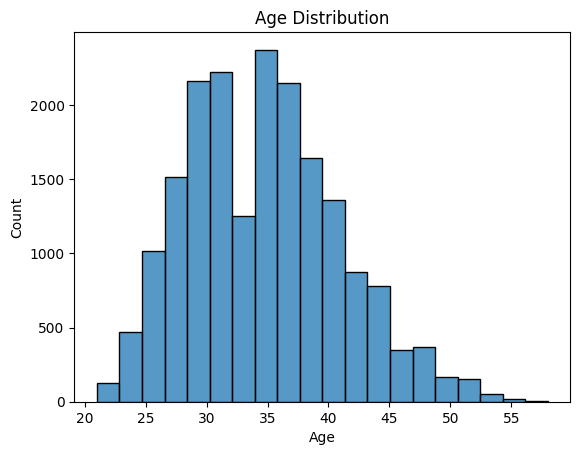

In [ ]:
    # Univariate Analysis
    print("\nUnivariate Analysis:")
    # Distribution plots for continuous variables
    sns.histplot(df['Age'], bins=20)
    plt.title("Age Distribution")
    plt.show()

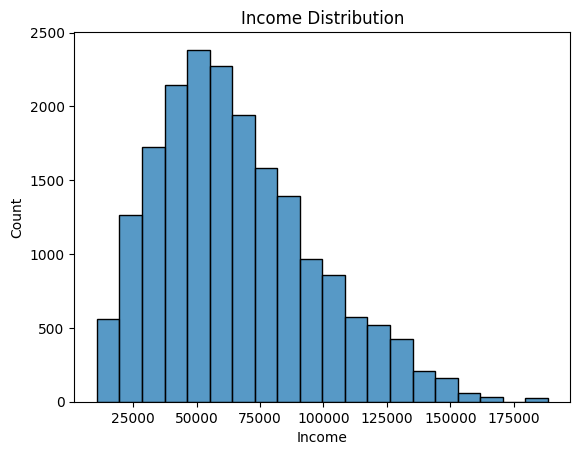

In [ ]:
    sns.histplot(df['Income'], bins=20)
    plt.title("Income Distribution")
    plt.show()

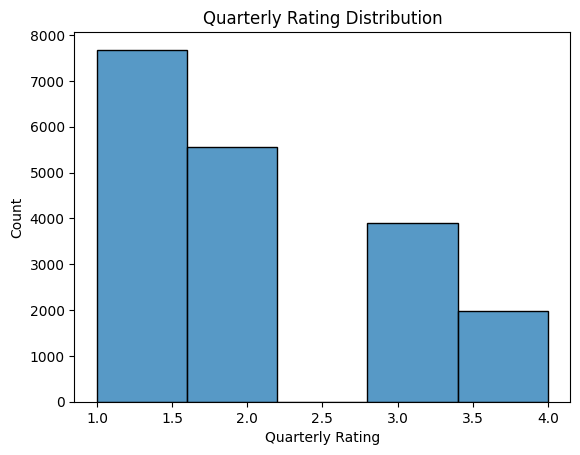

In [ ]:
    sns.histplot(df['Quarterly Rating'], bins=5)
    plt.title("Quarterly Rating Distribution")
    plt.show()

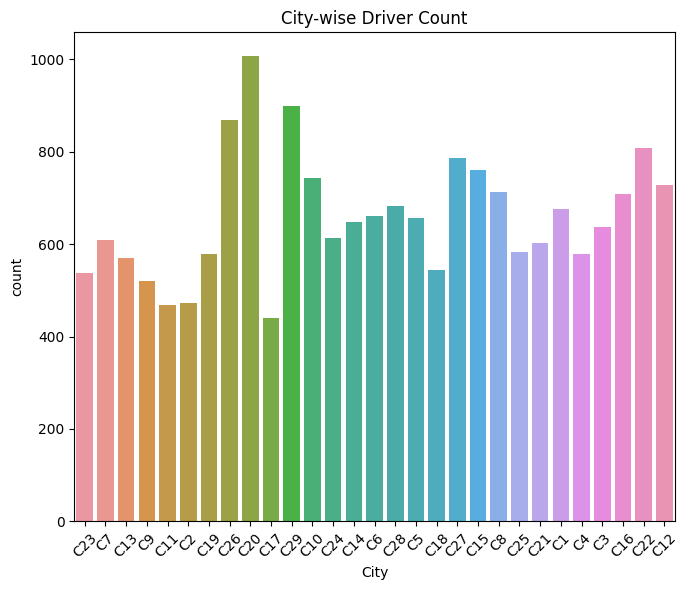

In [ ]:
# Bar plots/count plots for categorical variables
plt.figure(figsize=(7, 6))  # Adjust the figure size
sns.countplot(data=df, x='City')
plt.title("City-wise Driver Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure that all elements fit within the plot area
plt.show()

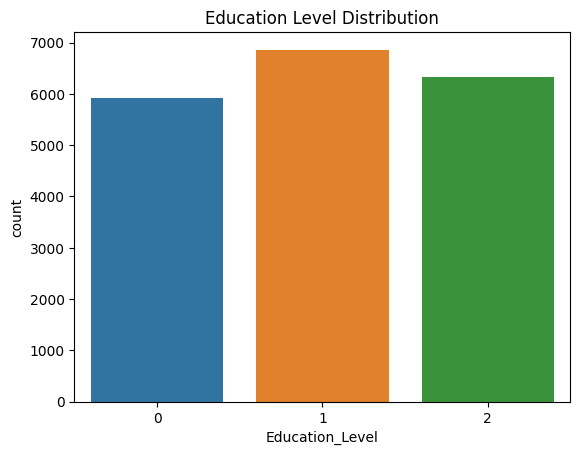

In [ ]:
    sns.countplot(data=df, x='Education_Level')
    plt.title("Education Level Distribution")
    plt.show()

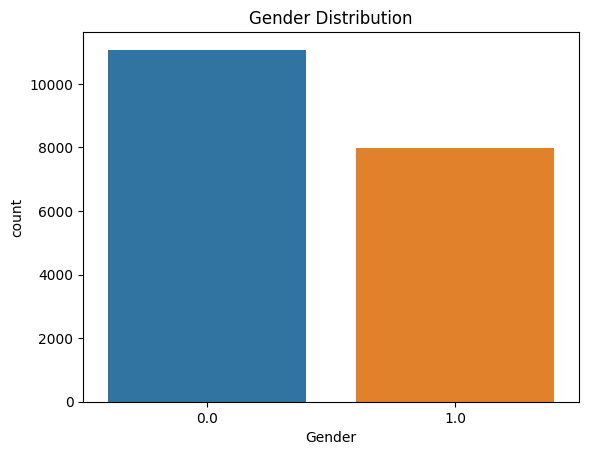

In [ ]:
    sns.countplot(data=df, x='Gender')
    plt.title("Gender Distribution")
    plt.show()


Bivariate Analysis:


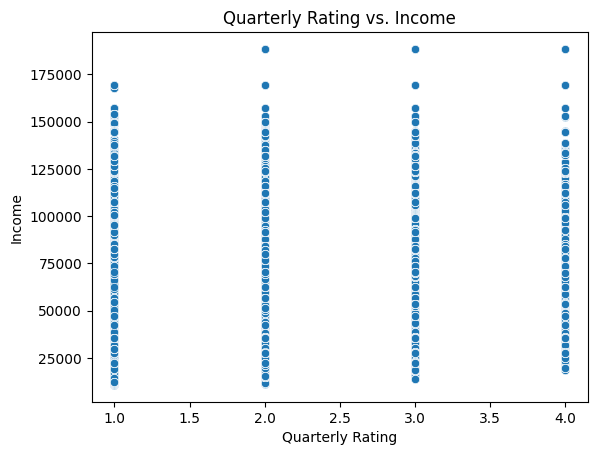

In [ ]:
    # Bivariate Analysis
    print("\nBivariate Analysis:")
    # Relationship between 'Quarterly Rating' and 'Income'
    sns.scatterplot(data=df, x='Quarterly Rating', y='Income')
    plt.title("Quarterly Rating vs. Income")
    plt.show()

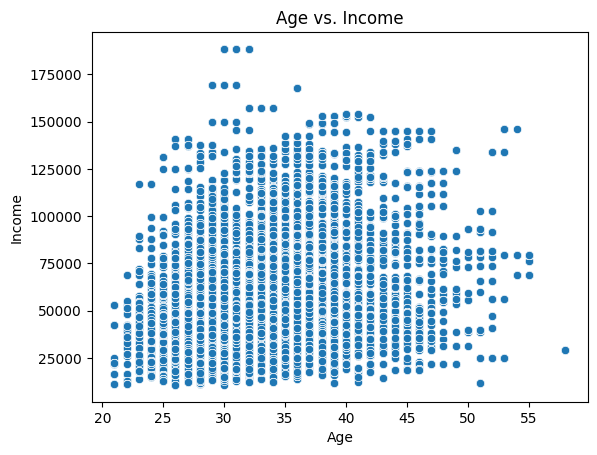

In [ ]:
    # Relationship between 'Age' and 'Income'
    sns.scatterplot(data=df, x='Age', y='Income')
    plt.title("Age vs. Income")
    plt.show()

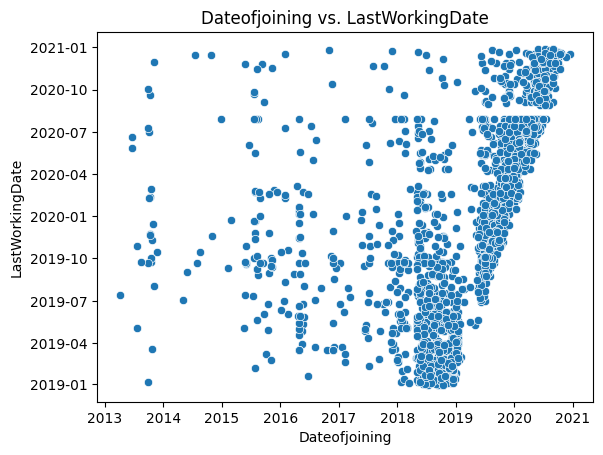

In [ ]:
    # Relationship between 'Date Of Joining' and 'LastWorkingDate'
    sns.scatterplot(data=df, x='Dateofjoining', y='LastWorkingDate')
    plt.title("Dateofjoining vs. LastWorkingDate")
    plt.show()

In [ ]:
def feature_engineering(df):
    # Sort the dataframe by Driver_ID and Reporting Date
    df.sort_values(by=['Driver_ID', 'MMM-YY'], ascending=True, inplace=True)

    # Create columns for previous quarter rating and previous month income
    df['Previous_Quarter_Rating'] = df.groupby('Driver_ID')['Quarterly Rating'].shift(1)
    df['Previous_Month_Income'] = df.groupby('Driver_ID')['Income'].shift(1)

    # Create columns indicating whether quarterly rating and monthly income have increased for each driver
    df['Quarterly_Rating_Increase'] = (df['Quarterly Rating'] > df['Previous_Quarter_Rating']).astype(int)
    df['Monthly_Income_Increase'] = (df['Income'] > df['Previous_Month_Income']).astype(int)

    # Create the target variable for attrition prediction
    df['Target'] = (df['LastWorkingDate'].notnull()).astype(int)

    return df

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

def data_preprocessing(df):
    # Convert 'MMM-YY' and 'Dateofjoining' columns to numeric representation
    df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
    df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

    # Extract year and month from 'MMM-YY' column and create separate numeric features
    df['Year'] = df['MMM-YY'].dt.year.astype(int)
    df['Month'] = df['MMM-YY'].dt.month.astype(int)

    # Convert the target variable 'Target' to int64
    df['Target'] = df['Target'].astype(int)

    # One-hot encoding of the categorical variables 'City', 'Education_Level', and 'Gender'
    df = pd.get_dummies(df, columns=['City', 'Education_Level', 'Gender'], drop_first=True)

    # Separate features (X) and target variable (y) before oversampling
    X = df.drop(['Driver_ID', 'MMM-YY', 'LastWorkingDate', 'Dateofjoining', 'Target'], axis=1)
    y = df['Target']

    # Handle missing values for numeric features using SimpleImputer
    numerical_features = ['Year', 'Month', 'Age', 'Income', 'Quarterly Rating', 'Total Business Value',
                          'Previous_Quarter_Rating', 'Previous_Month_Income']
    imputer = SimpleImputer(strategy='median')
    X[numerical_features] = imputer.fit_transform(X[numerical_features])

    # Class Imbalance Treatment using resample
    X_resampled, y_resampled = resample(X[y==0], y[y==0], replace=True, n_samples=sum(y==1), random_state=42)
    X_resampled = pd.concat([X[y==1], X_resampled])
    y_resampled = pd.concat([y[y==1], y_resampled])

    # Standardization of training data
    scaler = StandardScaler()
    X_resampled = scaler.fit_transform(X_resampled)

    return X_resampled, y_resampled


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # ROC AUC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Classification Report
    classification_rep = classification_report(y_test, y_pred)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)

    return classification_rep, roc_auc


Data Shape: (19104, 14)

Data Types of Attributes:
Unnamed: 0                       int64
MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                        category
City                          category
Education_Level               category
Income                         float64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value           float64
Quarterly Rating               float64
dtype: object

Missing Value Counts:
Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total 

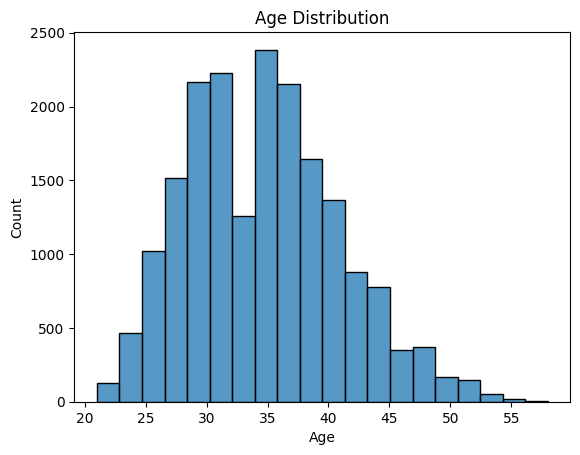

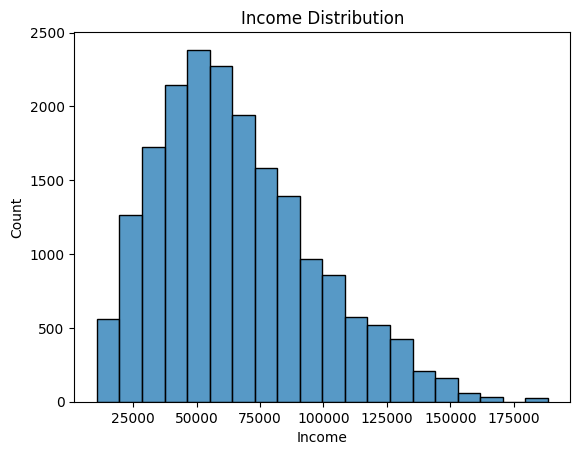

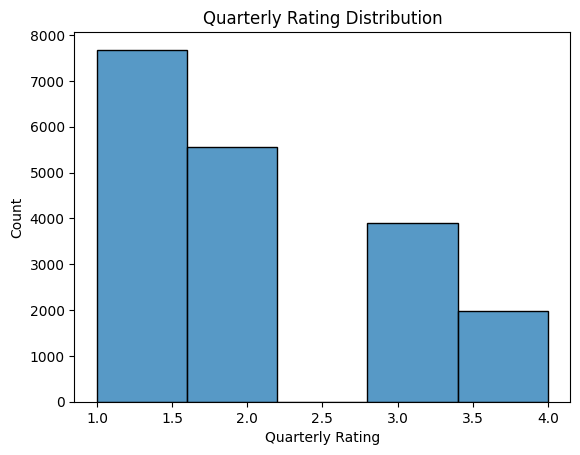

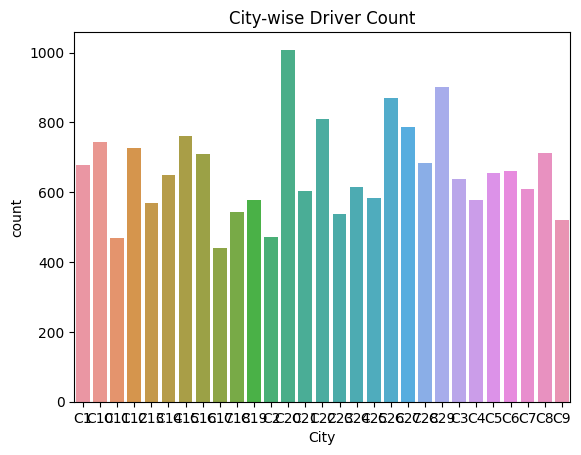

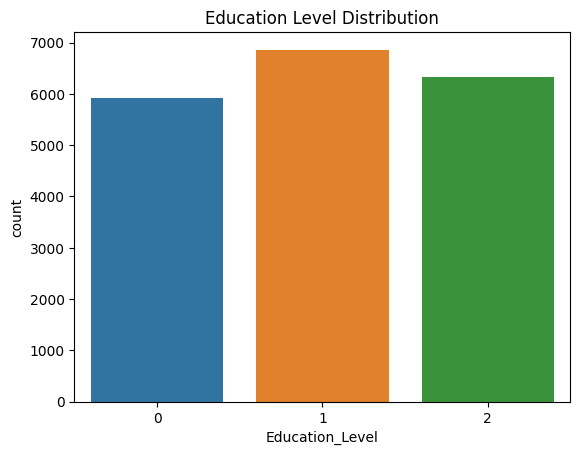

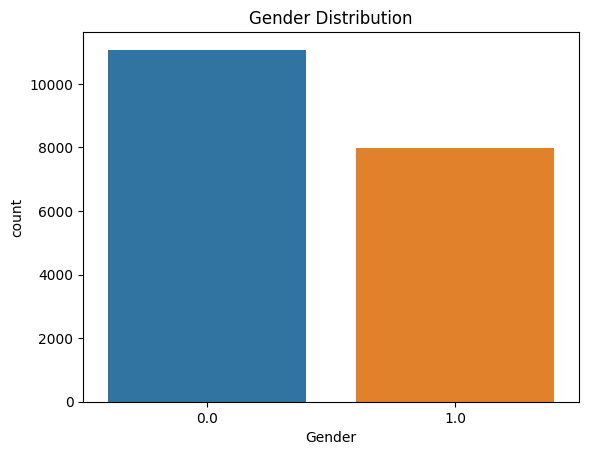


Bivariate Analysis:


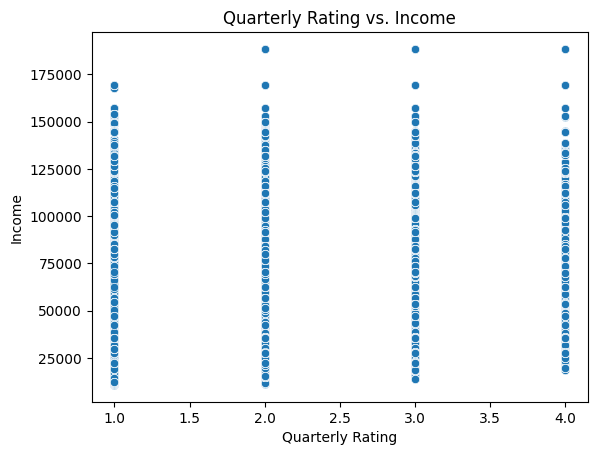

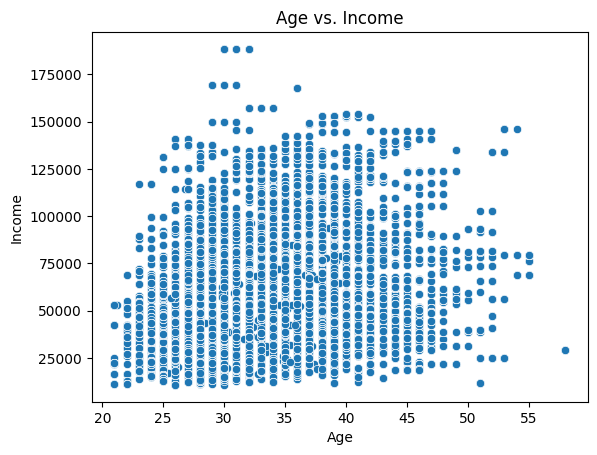

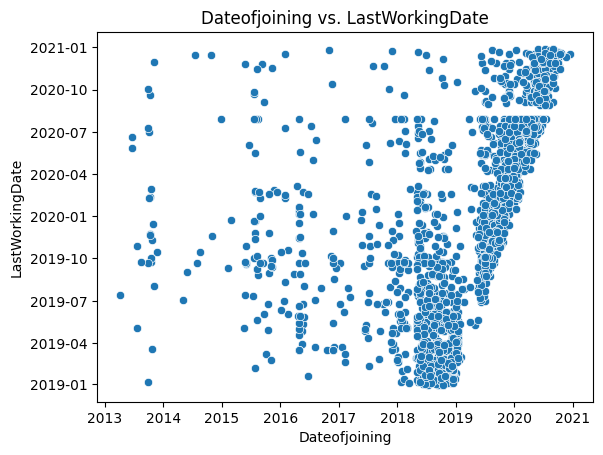

Random Forest Classifier:


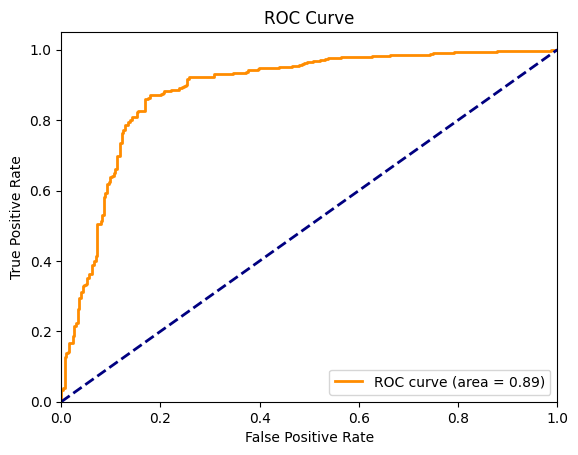

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       303
           1       0.85      0.85      0.85       344

    accuracy                           0.84       647
   macro avg       0.84      0.84      0.84       647
weighted avg       0.84      0.84      0.84       647


AdaBoost Classifier:


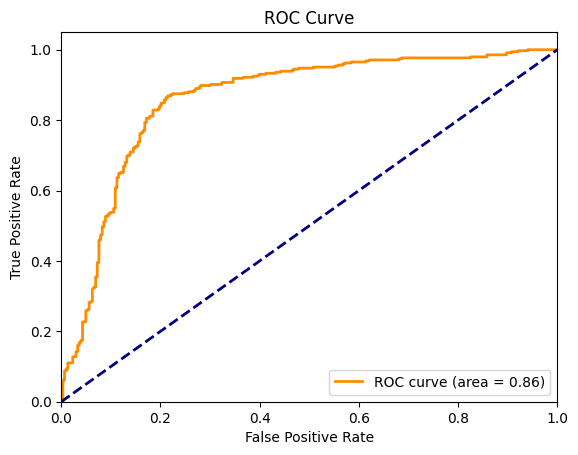

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       303
           1       0.82      0.85      0.84       344

    accuracy                           0.83       647
   macro avg       0.83      0.82      0.82       647
weighted avg       0.83      0.83      0.83       647



In [ ]:
def main():
    # Load and Preprocess the Data
    file_path = 'ola_driver.csv'
    data_df = load_and_preprocess_data(file_path)

    # Exploratory Data Analysis
    perform_eda(data_df)

    # Feature Engineering
    data_df = feature_engineering(data_df)

    # Data Preprocessing
    X, y = data_preprocessing(data_df)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ensemble Learning - RandomForestClassifier
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
    rf_grid_search.fit(X_train, y_train)
    rf_best_model = rf_grid_search.best_estimator_

    # Ensemble Learning - AdaBoostClassifier
    param_grid_ada = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    }
    ada_grid_search = GridSearchCV(AdaBoostClassifier(), param_grid_ada, cv=5)
    ada_grid_search.fit(X_train, y_train)
    ada_best_model = ada_grid_search.best_estimator_

    # Evaluate Models
    print("Random Forest Classifier:")
    rf_classification_rep, rf_roc_auc = evaluate_model(rf_best_model, X_test, y_test)
    print(rf_classification_rep)

    print("\nAdaBoost Classifier:")
    ada_classification_rep, ada_roc_auc = evaluate_model(ada_best_model, X_test, y_test)
    print(ada_classification_rep)

    # Provide Actionable Insights & Recommendations
    # Based on the analysis, focus on improving driver retention strategies by identifying factors
    # that influence driver attrition and developing targeted interventions.

if __name__ == "__main__":
    main()